# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

 **Sumber Dataset**:  
   Dataset dapat diperoleh dari Kaggle dengan nama [Beverage Sales](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales)
   


**Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Import library untuk manipulasi data
import pandas as pd
import numpy as np

#Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data = pd.read_csv('synthetic_beverage_sales_data.csv')
data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

####Memahami Struktur Data

In [3]:
data.shape

(8999910, 11)

In [4]:
data.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


In [5]:
data.dtypes

Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object

In [6]:
df_New = data.head(50000)
df_New = df_New.reset_index(drop=True)

# Periksa ukuran dataset yang baru
print(f"Ukuran dataset: {df_New.shape}")

Ukuran dataset: (50000, 11)


Saya menggunakan 50.000 baris data untuk memaksimalkan efisiensi waktu komputasi dalam proses modeling. Pemilihan ini didasarkan pada ukuran dataset yang mencapai sekitar 8 juta baris data.

####Menangani Missing Value dan Duplikasi

In [7]:
df_New.isna().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

In [8]:
print("Jumlah duplikasi data : ",df_New.duplicated().sum())

Jumlah duplikasi data :  0


####Analisis Distribusi dan Korelasi

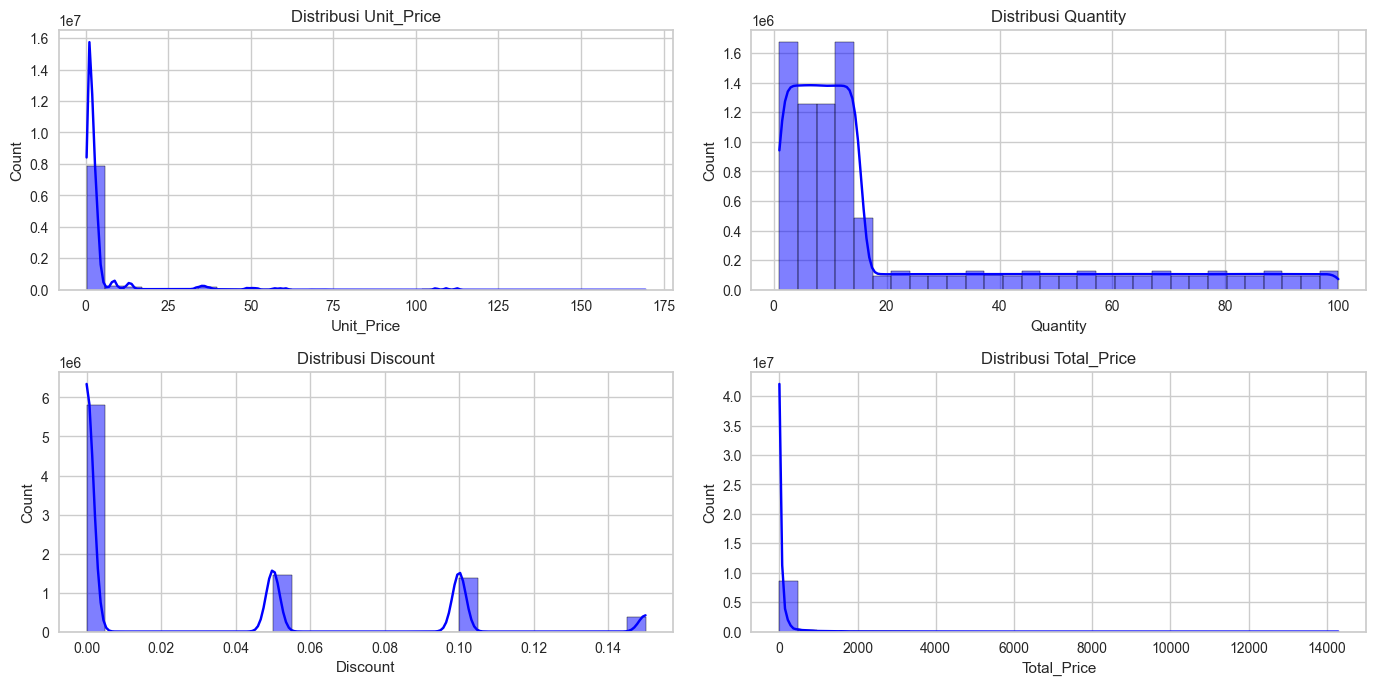

In [9]:
#Visualisasi Distribusi kolom numerik
numerical_cols = df_New.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [10]:
#Membuat matriks korelasi
numerical_data = df_New[numerical_cols]
correlation_matrix = numerical_data.corr()
correlation_matrix

,Unit_Price,Quantity,Discount,Total_Price
Unit_Price,1.000000,0.016181,0.005587,0.621708
Quantity,0.016181,1.000000,0.823857,0.310958
Discount,0.005587,0.823857,1.000000,0.249348
Total_Price,0.621708,0.310958,0.249348,1.000000


####Visualisasi Data

#####A. Visualisasi Data Kategorikal

C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_27836\4038879902.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")


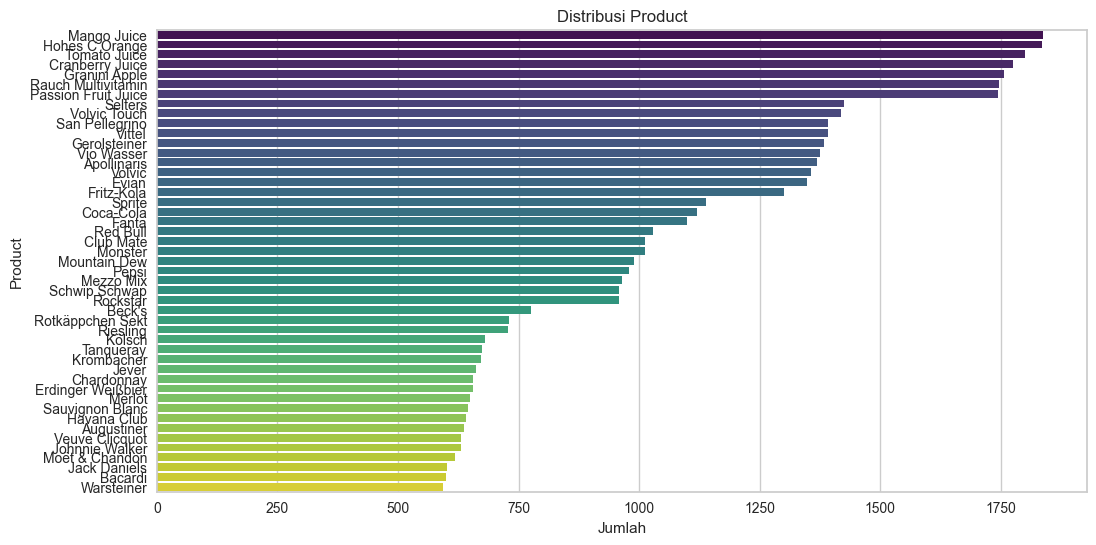

In [11]:
#Visualisasi Product
plt.figure(figsize=(12, 6))
item_counts = df_New["Product"].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")
plt.xlabel("Jumlah")
plt.ylabel("Product")
plt.title("Distribusi Product")
plt.show()

C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_27836\806114069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")


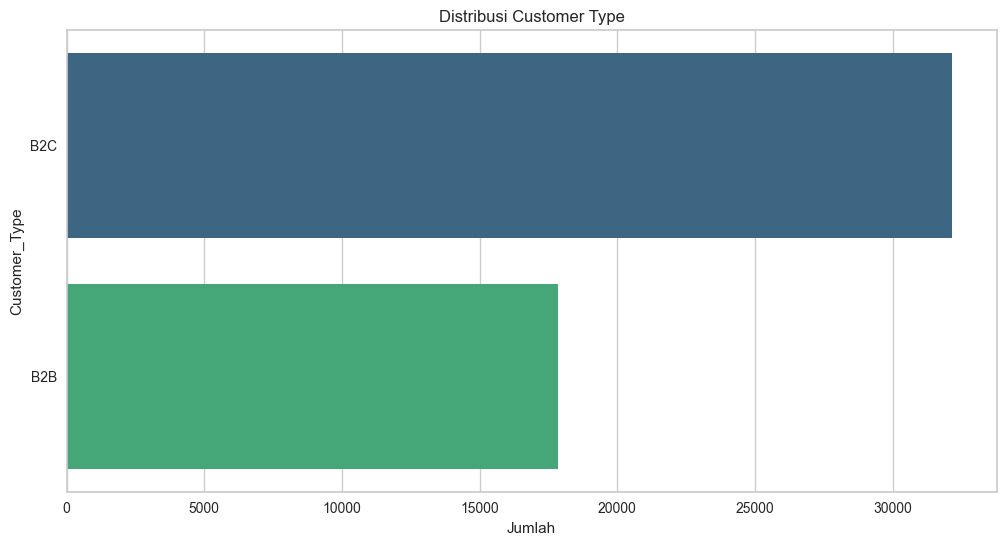

In [12]:
#Visualisasi Customer Type
plt.figure(figsize=(12, 6))
item_counts = df_New["Customer_Type"].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")
plt.xlabel("Jumlah")
plt.ylabel("Customer_Type")
plt.title("Distribusi Customer Type")
plt.show()

C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_27836\289295619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")


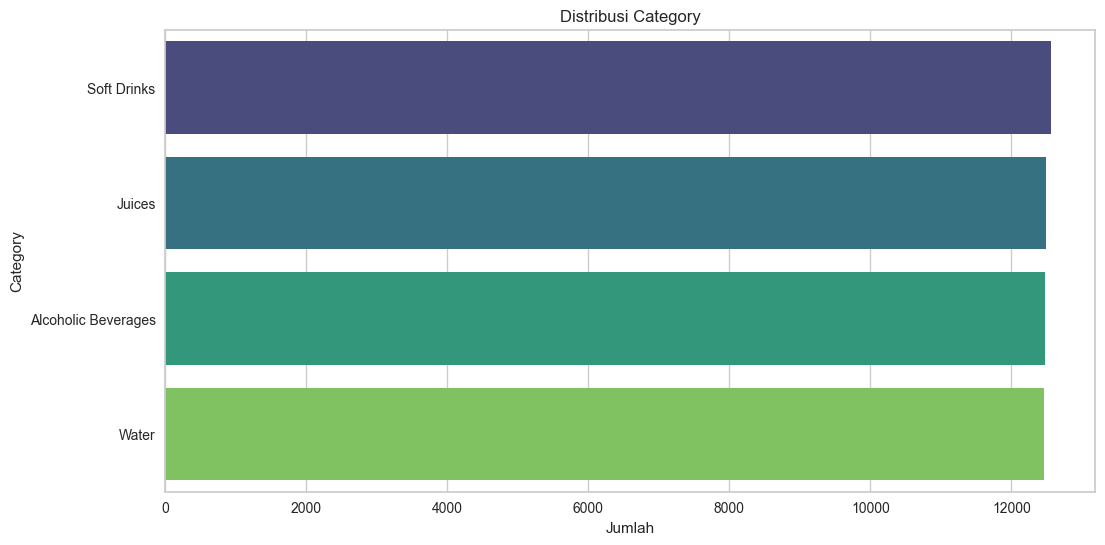

In [13]:
#Visualisasi Category
plt.figure(figsize=(12, 6))
item_counts = df_New["Category"].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")
plt.xlabel("Jumlah")
plt.ylabel("Category")
plt.title("Distribusi Category")
plt.show()

C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_27836\2365217756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")


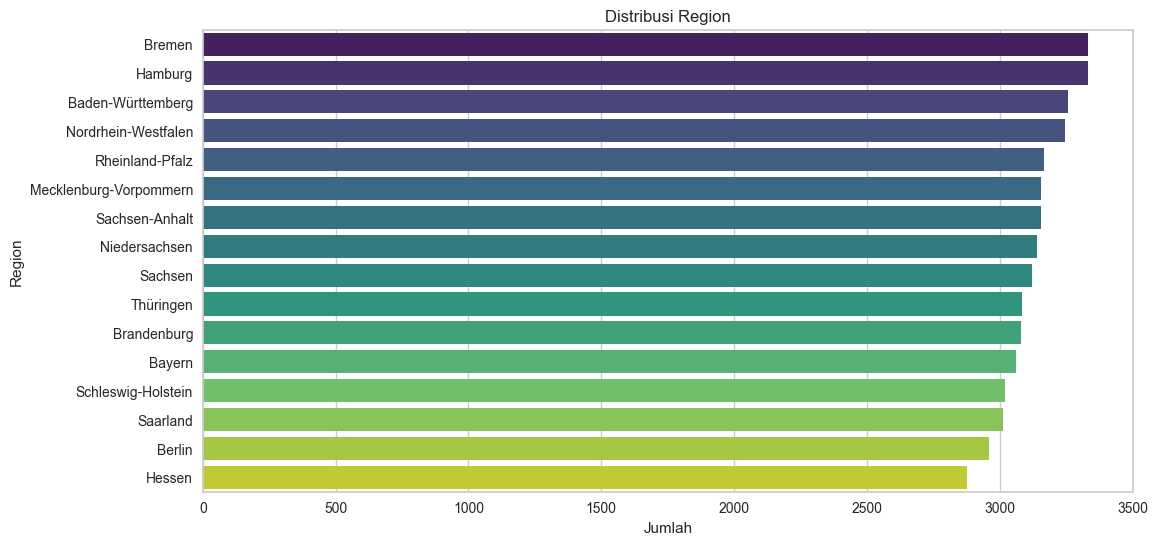

In [14]:
#Visualisasi Region
plt.figure(figsize=(12, 6))
item_counts = df_New["Region"].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette="viridis")
plt.xlabel("Jumlah")
plt.ylabel("Region")
plt.title("Distribusi Region")
plt.show()

#####Visualisasi Korelasi

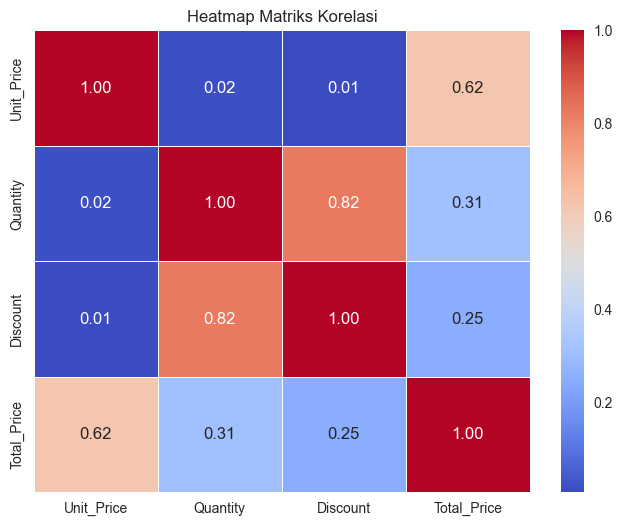

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Matriks Korelasi")
plt.show()

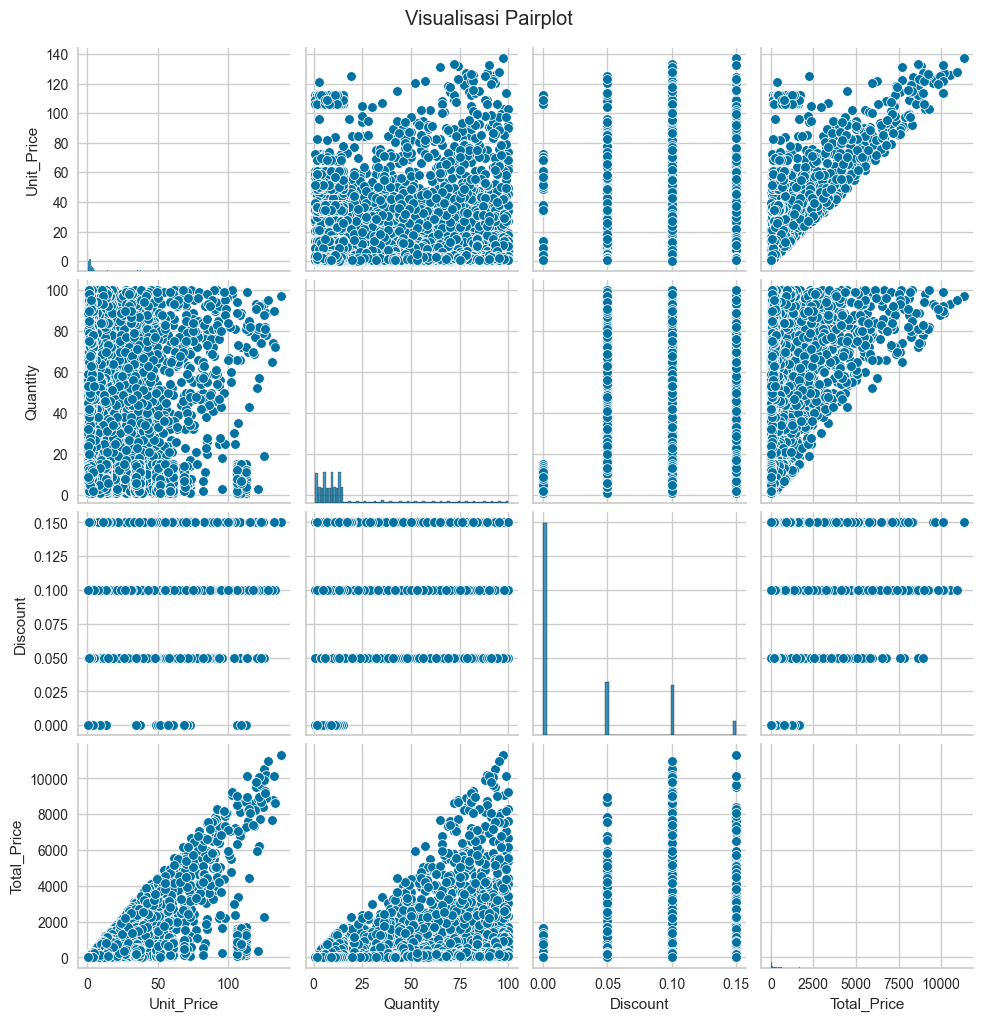

In [16]:
#Membuat Pairplot
num_features = df_New.select_dtypes(include=[np.float64, np.int64])
sns.pairplot(num_features)
plt.suptitle('Visualisasi Pairplot ', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#####Menghapus Fitur/Kolom yang Kurang Relevan

In [17]:
df_New = df_New.drop(columns=[col for col in ["Order_ID","Customer_ID", "Order_Date"] if col in data.columns])
df_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  50000 non-null  object 
 1   Product        50000 non-null  object 
 2   Category       50000 non-null  object 
 3   Unit_Price     50000 non-null  float64
 4   Quantity       50000 non-null  int64  
 5   Discount       50000 non-null  float64
 6   Total_Price    50000 non-null  float64
 7   Region         50000 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.1+ MB


####Penanganan Outliers

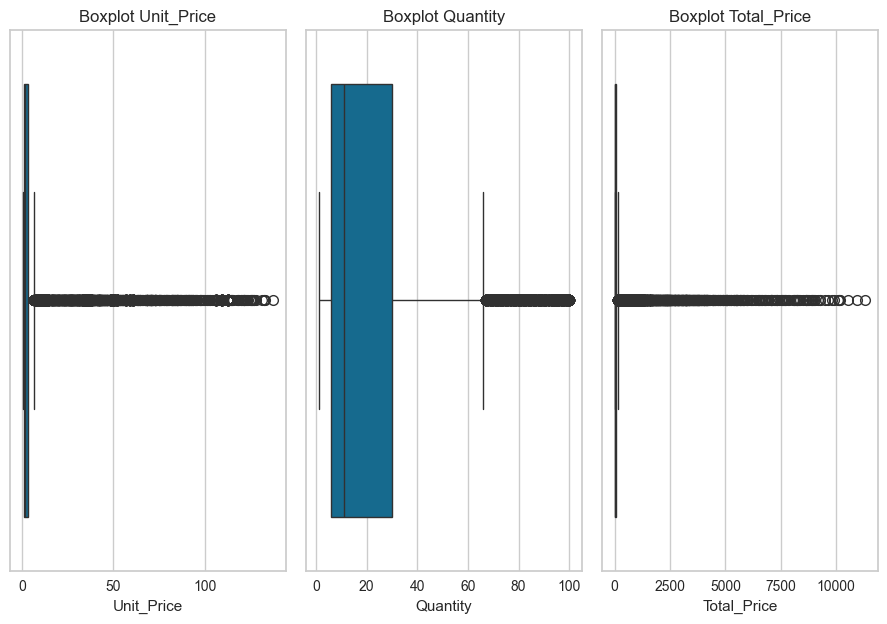

In [18]:
#Deteksi Outliers
num_features = ["Unit_Price", "Quantity", "Total_Price"]
num_cols = 4
num_rows = int(np.ceil(len(num_features)))
plt.figure(figsize=(12, 6 * num_rows))
for i, col in enumerate(num_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df_New[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

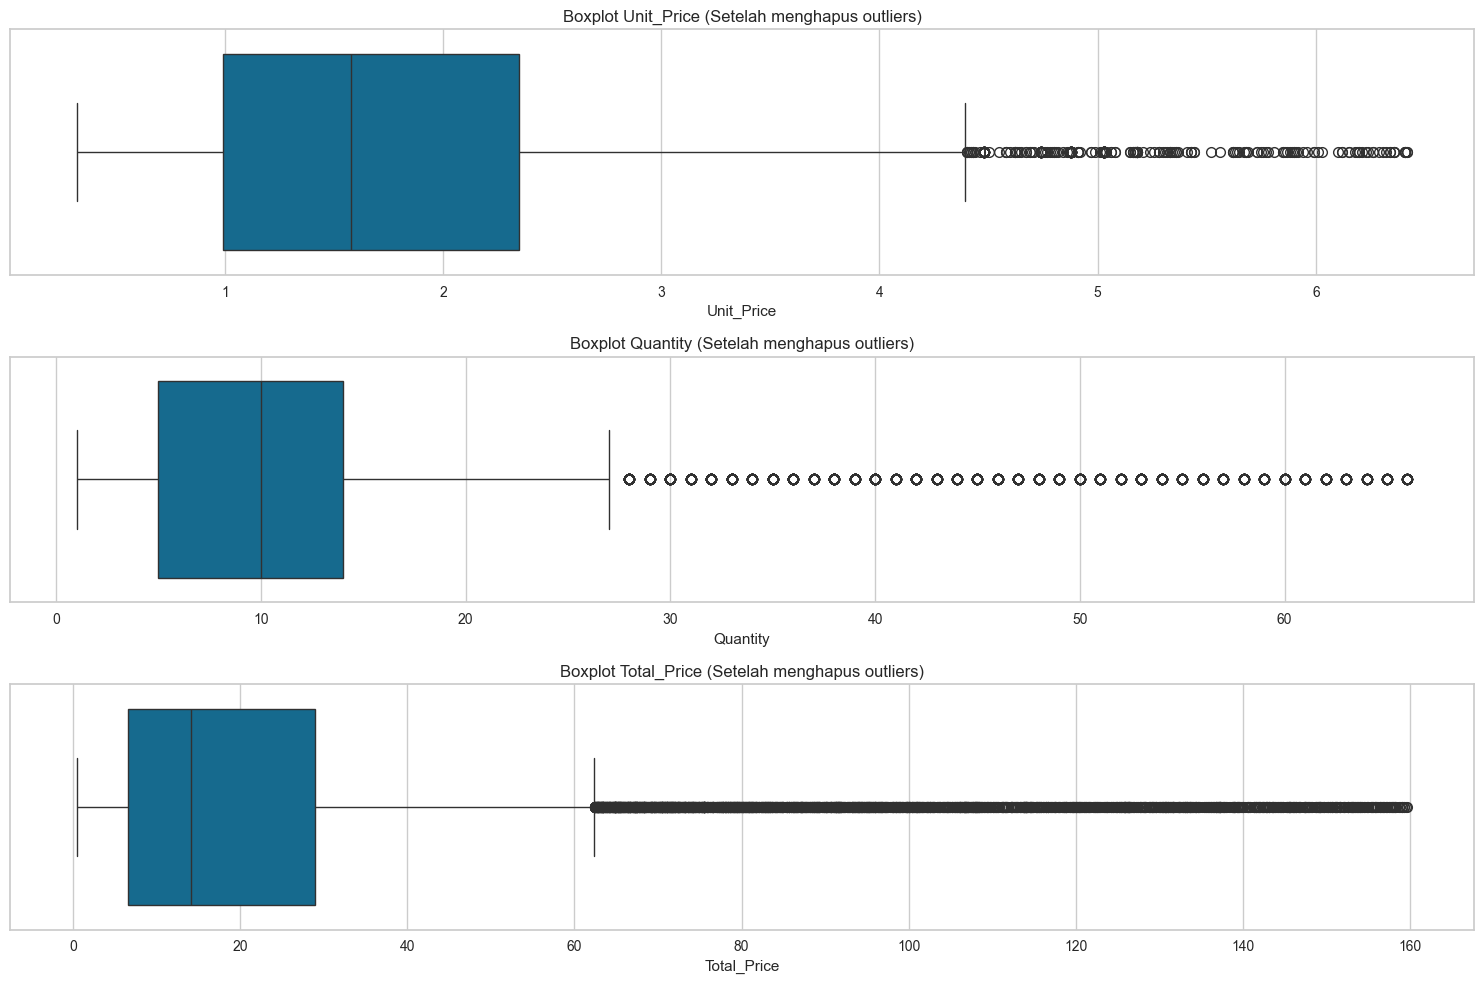

In [19]:
#Menghapus Outliers
num_features = ["Unit_Price", "Quantity", "Total_Price"]
Q1 = df_New[num_features].quantile(0.25)
Q3 = df_New[num_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dataClean = df_New[~((df_New[num_features] < lower_bound) | (df_New[num_features] > upper_bound)).any(axis=1)]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)
    sns.boxplot(x=dataClean[col])
    plt.title(f"Boxplot {col} (Setelah menghapus outliers)")
plt.tight_layout()
plt.show()

In [20]:
dataClean.shape

(38312, 8)

####Encoding Data Kategorikal

In [21]:
cat_features = dataClean.select_dtypes(include=['object', 'category']).columns.tolist()
# Menyalin DataFrame asli
dataLabel = dataClean.copy()

label_encoders = {}
# Loop melalui setiap kolom kategorikal dan lakukan encoding
for col in cat_features:
    le = LabelEncoder()
    dataLabel[col] = le.fit_transform(dataClean[col])
    label_encoders[col] = le

dataLabel.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,0,35,3,1.66,53,0.10,79.18,0
4,0,11,3,0.87,35,0.10,27.40,0
6,0,34,1,2.14,44,0.10,84.74,5
7,0,36,3,0.43,13,0.05,5.31,5
9,0,8,3,1.38,3,0.05,3.93,5


####Normalisasi Fitur

In [22]:
scaler = MinMaxScaler()
dataNorm = dataLabel.copy()
dataNorm = pd.DataFrame(scaler.fit_transform(dataNorm), columns=dataClean.columns)
dataNorm

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,0.0,0.897436,1.000000,0.219672,0.800000,0.666667,0.494509,0.000000
1,0.0,0.282051,1.000000,0.090164,0.523077,0.666667,0.169564,0.000000
2,0.0,0.871795,0.333333,0.298361,0.661538,0.666667,0.529401,0.333333
3,0.0,0.923077,1.000000,0.018033,0.184615,0.333333,0.030938,0.333333
4,0.0,0.205128,1.000000,0.173770,0.030769,0.333333,0.022278,0.333333
...,...,...,...,...,...,...,...,...
38307,1.0,0.153846,0.333333,0.549180,0.015385,0.000000,0.043677,0.400000
38308,1.0,0.564103,0.333333,0.457377,0.169231,0.000000,0.231817,0.400000
38309,1.0,0.000000,1.000000,0.109836,0.107692,0.000000,0.047317,0.400000
38310,1.0,0.666667,0.000000,0.614754,0.153846,0.000000,0.278569,0.666667


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, saya menggunakan algoritma Kmeans

In [23]:
kmeansModel = KMeans(n_clusters=3, random_state=69)
kmeansModel.fit_predict(dataNorm)
kmeansModel

KMeans(n_clusters=3, random_state=69)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

#####Menghitung Silhouette Score

In [24]:
silhouetteModel = silhouette_score(dataNorm, kmeansModel.labels_)
print(f"Silhouette Score: {silhouetteModel}")

Silhouette Score: 0.2973931504733182


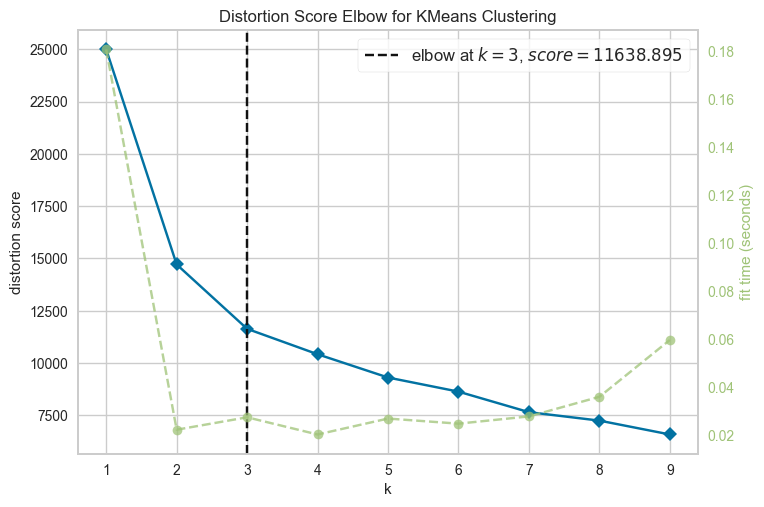

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(dataNorm)
visualizer.show()

In [26]:
kmeansAfter = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
kmeansAfter.fit_predict(dataNorm)
silhouetteAfter = silhouette_score(dataNorm, kmeansAfter.labels_)
print(f"Silhouette Score: {silhouetteAfter}")

Silhouette Score: 0.2923467942594719


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [27]:
#menggunakan 3 fitur
selector = SelectKBest(f_classif, k=3)
yKmeans = kmeansAfter.labels_
XKmeans = selector.fit_transform(dataNorm, yKmeans)
selected_feature_indices = selector.get_support(indices=True)
selected_features = dataNorm.columns[selected_feature_indices]
print("Selected Features:", selected_features)
data_selected = dataNorm[selected_features]

Selected Features: Index(['Customer_Type', 'Quantity', 'Discount'], dtype='object')


c:\Users\YOHANES ALDO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [28]:
#Mengurangi dimensi menjadi 0.9
pca = PCA(n_components=0.9)
xPCA = pca.fit_transform(data_selected)

In [29]:
kmeans_selected = KMeans(n_clusters=visualizer.elbow_value_, random_state=69)
kmeansLabel = kmeans_selected.fit_predict(xPCA)
silhouette_selected = silhouette_score(xPCA, kmeansLabel)
print(f"Silhouette Score (after feature selection): {silhouette_selected}")

Silhouette Score (after feature selection): 0.8814121875841043


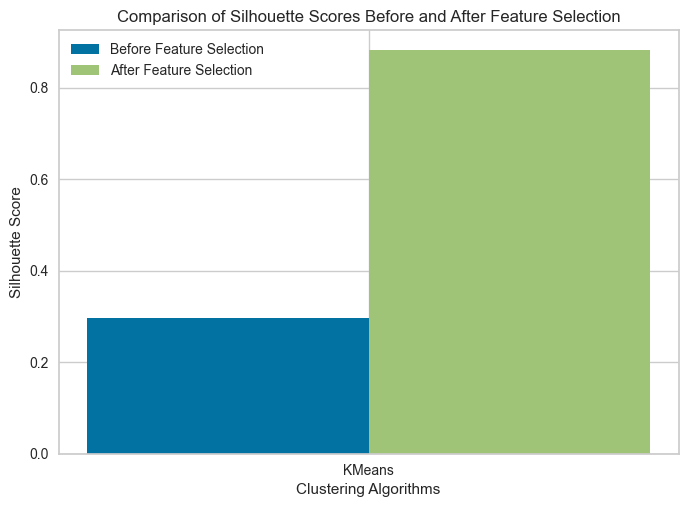

In [30]:
algorithms = ['KMeans']
before_fs = [silhouetteModel]
after_fs = [silhouette_selected]

X_axis = np.arange(len(algorithms))
plt.bar(X_axis - 0.2, before_fs, 0.4, label='Before Feature Selection')
plt.bar(X_axis + 0.2, after_fs, 0.4, label='After Feature Selection')

plt.xticks(X_axis, algorithms)
plt.xlabel("Clustering Algorithms")
plt.ylabel("Silhouette Score")
plt.title("Comparison of Silhouette Scores Before and After Feature Selection")
plt.legend()
plt.show()


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

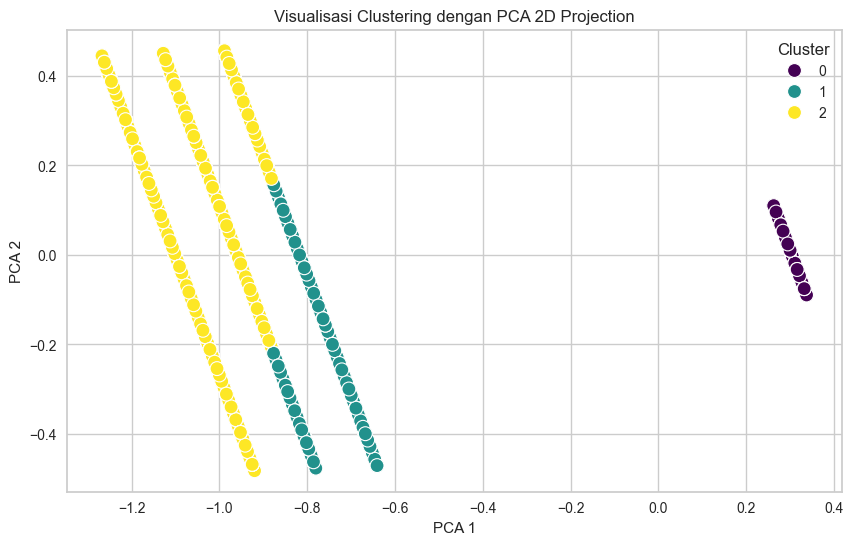

In [31]:
dataNorm['Cluster'] = kmeans_selected.labels_
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_selected)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=dataNorm['Cluster'], palette='viridis', s=100)
plt.title("Visualisasi Clustering dengan PCA 2D Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [32]:
dataNorm['Cluster'] = kmeans_selected.labels_

In [33]:
label_encoder_inverse = LabelEncoder()
for col in cat_features:
    label_encoder_inverse.fit(dataNorm[col].unique())
    # Get the LabelEncoder for the current column from the label_encoders dictionary
    dataNorm[col] = label_encoders[col].inverse_transform(dataNorm[col].astype(int))
dataNorm.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,B2B,Apollinaris,Juices,0.219672,0.800000,0.666667,0.494509,Baden-Württemberg,2
1,B2B,Apollinaris,Juices,0.090164,0.523077,0.666667,0.169564,Baden-Württemberg,2
2,B2B,Apollinaris,Alcoholic Beverages,0.298361,0.661538,0.666667,0.529401,Baden-Württemberg,2
3,B2B,Apollinaris,Juices,0.018033,0.184615,0.333333,0.030938,Baden-Württemberg,1
4,B2B,Apollinaris,Juices,0.173770,0.030769,0.333333,0.022278,Baden-Württemberg,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [34]:
features = ["Unit_Price", "Quantity", "Total_Price","Discount"]
scaler.fit(dataLabel[features])
dataNorm[features] = scaler.inverse_transform(dataNorm[features])
dataNorm

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,B2B,Apollinaris,Juices,1.66,53.0,0.10,79.18,Baden-Württemberg,2
1,B2B,Apollinaris,Juices,0.87,35.0,0.10,27.40,Baden-Württemberg,2
2,B2B,Apollinaris,Alcoholic Beverages,2.14,44.0,0.10,84.74,Baden-Württemberg,2
3,B2B,Apollinaris,Juices,0.43,13.0,0.05,5.31,Baden-Württemberg,1
4,B2B,Apollinaris,Juices,1.38,3.0,0.05,3.93,Baden-Württemberg,1
...,...,...,...,...,...,...,...,...,...
38307,B2C,Apollinaris,Alcoholic Beverages,3.67,2.0,0.00,7.34,Baden-Württemberg,0
38308,B2C,Apollinaris,Alcoholic Beverages,3.11,12.0,0.00,37.32,Baden-Württemberg,0
38309,B2C,Apollinaris,Juices,0.99,8.0,0.00,7.92,Baden-Württemberg,0
38310,B2C,Apollinaris,Alcoholic Beverages,4.07,11.0,0.00,44.77,Baden-Württemberg,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [35]:
for cluster_label in dataNorm['Cluster'].unique():
    cluster_data = dataNorm[dataNorm['Cluster'] == cluster_label]
    print(f"\nCluster {cluster_label}:")
    print(cluster_data.describe())


Cluster 2:
        Unit_Price     Quantity     Discount  Total_Price  Cluster
count  4332.000000  4332.000000  4332.000000  4332.000000   4332.0
mean      1.578968    47.185596     0.091771    66.703158      2.0
std       0.862789    13.378344     0.030139    38.531142      0.0
min       0.320000     1.000000     0.050000     0.610000      2.0
25%       0.900000    39.000000     0.050000    35.910000      2.0
50%       1.330000    50.000000     0.100000    58.030000      2.0
75%       2.220000    57.000000     0.100000    92.840000      2.0
max       6.360000    66.000000     0.150000   159.730000      2.0

Cluster 1:
        Unit_Price     Quantity     Discount  Total_Price  Cluster
count  5525.000000  5525.000000  5525.000000  5525.000000   5525.0
mean      1.628389    20.121086     0.055032    30.776494      1.0
std       1.065641    12.450030     0.015044    28.651853      0.0
min       0.320000     1.000000     0.050000     0.380000      1.0
25%       0.780000    10.000000     0.

####Analisis Karakteristik Cluster dari Model KMeans

#####**Cluster 0**
- **Rata-rata Unit Price:** 1.85
- **Rata-rata Quantity:** 8.03
- **Rata-rata Discount:** 0.00
- **Rata-rata Total Price:** 14.86

**Analisis:** Cluster ini merupakan kelompok terbesar dengan 28,455 transaksi. Pelanggan dalam cluster ini membeli dengan harga satuan yang relatif tinggi dibandingkan cluster lainnya, namun dalam jumlah yang relatif kecil. Yang paling signifikan adalah tidak adanya diskon sama sekali (0.00). Total harga pembelian berada di tingkat menengah. Ini menunjukkan bahwa pelanggan dalam cluster ini cenderung melakukan pembelian rutin dengan jumlah kecil tanpa mencari diskon. Mereka mungkin merupakan pelanggan reguler yang membeli berdasarkan kebutuhan, bukan karena tawaran promosi.

#####**Cluster 1**
- **Rata-rata Unit Price:** 1.63
- **Rata-rata Quantity:** 20.12
- **Rata-rata Discount:** 0.06
- **Rata-rata Total Price:** 30.78

**Analisis:** Cluster ini terdiri dari 5,525 transaksi dengan karakteristik pembelian dalam jumlah yang cukup besar dan memanfaatkan diskon kecil. Harga satuan produk relatif menengah, namun total pembelian cukup tinggi karena kuantitas yang besar. Pelanggan dalam cluster ini kemungkinan adalah pembeli grosir atau pelanggan yang membeli untuk kebutuhan bisnis skala kecil. Mereka mendapatkan sedikit diskon, mungkin karena pembelian dalam jumlah yang lebih besar dari rata-rata.

#### **Cluster 2**
- **Rata-rata Unit Price:** 1.58
- **Rata-rata Quantity:** 47.19
- **Rata-rata Discount:** 0.09
- **Rata-rata Total Price:** 66.70

**Analisis:** Cluster ini adalah kelompok terkecil dengan 4,332 transaksi, tetapi memiliki karakteristik yang sangat berbeda. Pelanggan dalam cluster ini membeli dalam jumlah yang sangat besar (lebih dari dua kali lipat dari Cluster 1) dan mendapatkan diskon yang paling tinggi. Meskipun harga satuan mereka adalah yang terendah di antara ketiga cluster, total pembelian mereka adalah yang tertinggi karena volume yang besar. Ini menunjukkan bahwa mereka adalah pembeli grosir atau pelanggan institusional yang sensitif terhadap harga dan menegosiasikan diskon untuk pembelian volume besar.

**Kesimpulan**
Berdasarkan hasil visualisasi PCA juga, dapat dilihat bahwa ketiga cluster memiliki pemisahan yang jelas dengan pola distribusi yang berbeda. Cluster 0 (ungu) terkumpul di sisi kanan, sementara Cluster 1 (hijau) dan Cluster 2 (kuning) membentuk pola garis yang berbeda di sisi kiri grafik. Perbedaan ini menunjukkan bahwa algoritma KMeans berhasil memisahkan data menjadi segmen yang bermakna berdasarkan karakteristik pembelian mereka.
Strategi pemasaran yang berbeda dapat diterapkan untuk masing-masing cluster:

**Cluster 0:** Fokus pada kualitas produk dan layanan pelanggan untuk mempertahankan loyalitas
**Cluster 1:** Tawarkan insentif untuk meningkatkan volume pembelian
**Cluster 2:** Pertahankan program diskon volume dan tawarkan layanan VIP untuk pelanggan besar

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [36]:
dataNorm.to_csv('Hasil_Clustering.csv', index=False)